### Import relevant packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read in data and keep only anxiety, depression, and stress related data points

In [3]:
df = pd.read_csv("data_counsel_chat.csv")

In [4]:
options = ['anxiety', 'depression', 'stress'] 
df = df[df['topic'].isin(options)]

### Basic Exploration of Data

In [5]:
# Number of observations and columns
print(df.shape)

(586, 12)


In [6]:
# Number of unique questions
print("Number of unique questions: ", df.questionID.nunique())

Number of unique questions:  223


In [7]:
# Number of unique therapists 
print("Number of unique therapists: ", df.therapistInfo.nunique())

Number of unique therapists:  183


In [8]:
# Correlaton between upvotes and views
df[['views', 'upvotes']].corr()

,views,upvotes
views,1.000000,0.285856
upvotes,0.285856,1.000000


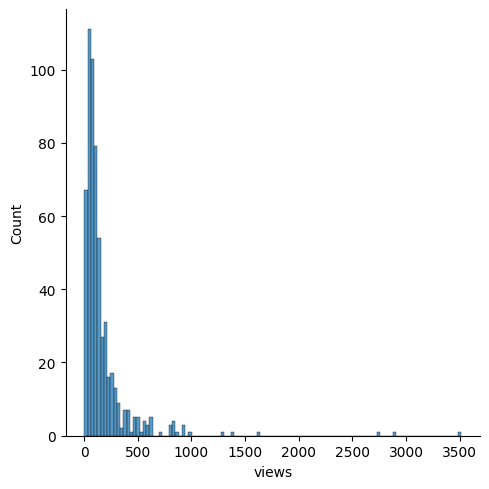

In [9]:
# Distribution plot of views feature
sns.displot(df.views)

<Axes: xlabel='upvotes', ylabel='Count'>

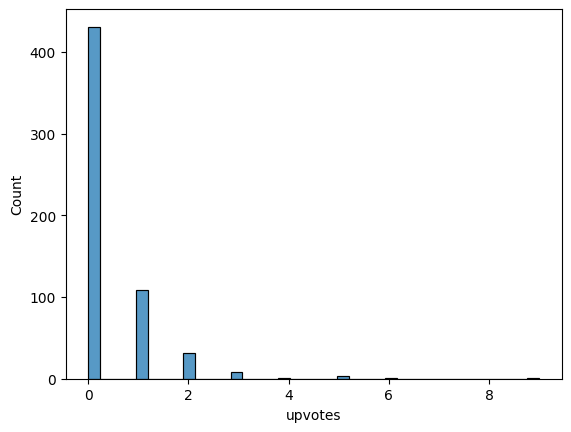

In [10]:
# Distribution plot of upvotes feature
sns.histplot(df.upvotes)

### Basic Cleaning

In [11]:
import unicodedata

In [12]:
# Clean left-over unicode in text
df['answerText'] = df.answerText.apply(lambda x: unicodedata.normalize("NFKD", x))

In [13]:
# Remove extraneous bars in the text
df['answerText'] = df.answerText.str.replace('-','')

In [14]:
# # Cosine Similarity
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# def calculate_cosine_similarity(text1, text2):
#     # Create a TfidfVectorizer object
#     vectorizer = TfidfVectorizer()

#     # Fit and transform the texts into TF-IDF feature vectors
#     tfidf_matrix = vectorizer.fit_transform([text1, text2])

#     # Calculate the cosine similarity between the vectors
#     cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

#     return cosine_sim

# # # Example usage
# # text1 = "I enjoy playing soccer."
# # text2 = "I love playing basketball."
# text1 = """
# Feelings are real, is very unlikely that you are making them up since they are a response to the thoughts in your mind and your daily experiences and interactions. Often we assume that feeling sadness is bad and that we should only feel happiness and joy; but all feelings have a purpose: joy, sadness, anger, frustration, excitement, anxiety, among others.   Is not healthy to experience the same feeling for a long time, so we should learn to identify what causes them and how to process them so you can navigate through life experiences with more ease. I am a Licensed Professional Counselor in Texas, currently providing services in West Houston.  You may reach me at 7874665478 to schedule an appointment.
# """
# similarity = calculate_cosine_similarity(text1, chatgpt_response)
# print(f"Cosine Similarity: {similarity}")


ref) Different prompting (e.g. A Patient said (some question text). Imagine you are a counselor. What would you tell this patient? v.s. As a counselor, can you provide counseling for this patient?) returns different style of answers from the LLM.

### Save the file

In [15]:
df.to_csv("data_counsel_chat_cleaned.csv")